# 분류

```
- 예측 : 회귀, 분류
    회귀: 숫자 값 예측
    분류: 범주형 (어느 그룹에 속할까)
```

## 로지스틱 회귀분석_연습(20)

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier

import graphviz
from sklearn.model_selection import GridSearchCV

In [101]:
matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)

### 데이터 구성

In [102]:
df_raw = pd.read_csv("./Data2/HMEQ.csv", encoding = 'euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [103]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   int64  
 2   MORTDUE  3748 non-null   int64  
 3   VALUE    3734 non-null   float64
 4   REASON   3748 non-null   object 
 5   JOB      3667 non-null   object 
 6   YOJ      3543 non-null   float64
 7   DEROG    3748 non-null   int64  
 8   DELINQ   3718 non-null   float64
 9   CLAGE    3711 non-null   float64
 10  NINQ     3692 non-null   float64
 11  CLNO     3748 non-null   int64  
 12  DEBTINC  3748 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [104]:
print("Data 구조:", df_raw.shape)
print("변수: ", df_raw.columns)

Data 구조: (3748, 13)
변수:  Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')


### 데이터 전처리
#### 결측치

In [105]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [106]:
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

/tmp/ipykernel_3346/3605808036.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.fillna(df_raw.mean(), inplace = True)


#### 데이터 분할

In [107]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)

print("train data shape: ", df_train.shape)
print("test data shape: ", df_test.shape)

train data shape:  (2623, 13)
test data shape:  (1125, 13)


### 모델 및 회귀계수 검토

In [108]:
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + \
YOJ + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_train)
# 적합
log_result = log_model.fit()
# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Thu, 03 Aug 2023   Pseudo R-squ.:                  0.2257
Time:                        14:51:42   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

In [109]:
# 회귀계수가 유의한 변수만 사용한 모델
# 회귀계수 유의성 기준 제외변수(0.2 기준):GENDER,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO 등
log_model = Logit.from_formula("""BAD ~ C(JOB) + \
 DELINQ + CLAGE + NINQ + DEBTINC""", df_train)
# 적합
log_result = log_model.fit()
# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.247466
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2613
Method:                           MLE   Df Model:                            9
Date:                Thu, 03 Aug 2023   Pseudo R-squ.:                  0.1936
Time:                        14:51:42   Log-Likelihood:                -649.10
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 8.993e-62
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.4120      0.527    -10.266      0.000      -6.445      -4.379
C(JOB)[T

### 예측 및 성능 평가

In [110]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)
# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)
print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["BAD"],y_pred_train_class)),"\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head())
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["BAD"],y_pred_test_class)),"\n")

Train 예측 결과 
 3164    0
3314    0
93      0
1456    0
3327    0
dtype: int64 

Confusion Matrix: 
[[2374    8]
 [ 199   42]] 

Test 예측 결과 
 1721    0
822     0
1686    0
789     0
165     0
dtype: int64
Confusion Matrix: 
[[1019    2]
 [  88   16]] 



#### 평가

In [111]:
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["BAD"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["BAD"],y_pred_train_class)),"\n")
print(classification_report(df_train["BAD"], y_pred_train_class, digits=3))

# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["BAD"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["BAD"],y_pred_test_class)),"\n")
print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.921

Confusion Matrix: 
[[2374    8]
 [ 199   42]] 

              precision    recall  f1-score   support

           0      0.923     0.997     0.958      2382
           1      0.840     0.174     0.289       241

    accuracy                          0.921      2623
   macro avg      0.881     0.585     0.623      2623
weighted avg      0.915     0.921     0.897      2623

Test 예측/분류 결과
Accuracy: 0.920

Confusion Matrix: 
[[1019    2]
 [  88   16]] 

              precision    recall  f1-score   support

           0      0.921     0.998     0.958      1021
           1      0.889     0.154     0.262       104

    accuracy                          0.920      1125
   macro avg      0.905     0.576     0.610      1125
weighted avg      0.918     0.920     0.893      1125



<Axes: >

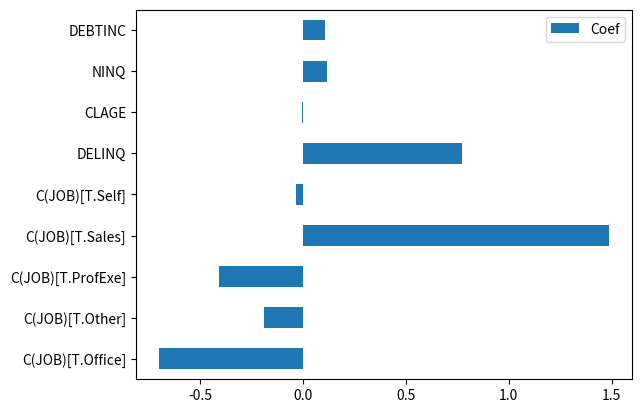

In [112]:
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

In [113]:
# select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = "object")

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char],axis = 1)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [114]:
# BAD 데이터를 0과 1로 변환, np.where(조건, 조건을 만족하는 경우, 만족하지 않는 경우)
df_scaled["BAD"] = np.where(df_scaled["BAD"]> 0, 1, 0)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [115]:
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled, # 데이터
                                                   test_size = 0.3, # test 데이터의 비율
                                                   random_state = 1234)  # random state

In [116]:
# from_formula 함수를 이용하여 변수 역할 지정
# scaled_log_model = Logit.from_formula("""CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) + SERVICE_DURATION +
#                                             DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME +
#                                             TOTAL_CALLS_NO + TOTAL_CALLS_TIME""" , df_scaled_train)

# 선정된 설명변수 기준
scaled_log_model = Logit.from_formula("""BAD ~ C(JOB) + \
 DELINQ + CLAGE + NINQ + DEBTINC""", df_scaled_train)


# 적합
scaled_log_result = scaled_log_model.fit()
# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.247466
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2613
Method:                           MLE   Df Model:                            9
Date:                Thu, 03 Aug 2023   Pseudo R-squ.:                  0.1936
Time:                        14:51:43   Log-Likelihood:                -649.10
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 8.993e-62
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5281      0.196    -12.916      0.000      -2.912      -2.144
C(JOB)[T

<Axes: >

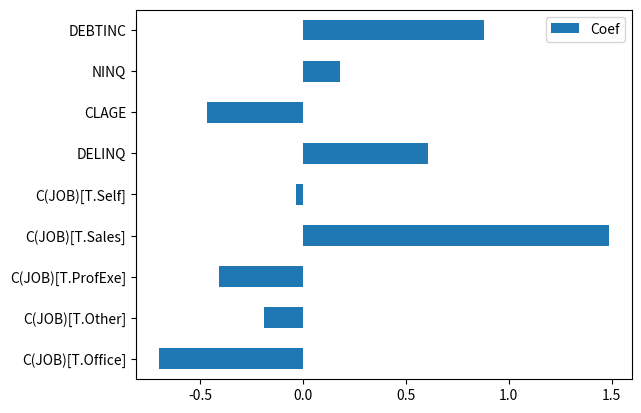

In [117]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

## 실습

In [118]:
df_raw = pd.read_csv("./Data2/통신고객이탈.csv" , engine = "python")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


# 의사결정나무

```
회귀트리

1. 처음에 시작하는 노드변수 선택 기준: 바로 밑에 rmse의 값이 작아져서 그 변수를 가지고 분기를 햇움00
-> 거기에 속해잇는 rmse 의 값이 가장 작게 나왔기 때문에 , rmse는 작은게 좋은거 ~ 



너무 예쁘다 ... 너무 귀엽다 어머 이게 머야 ... .ㅓㅏ귀엽다 ...... 

## 연습 47

In [176]:
from sklearn.tree import export_graphviz
import graphviz

from subprocess import call
from IPython.display import Image


In [177]:
df_raw = pd.read_csv("./Data2/HMEQ.csv" , engine = "python")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [178]:
# 결측값 확인 -> 처리 불필요
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [179]:
df_raw.fillna(df_raw.mean(), inplace = True)

/tmp/ipykernel_3346/4127166621.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.fillna(df_raw.mean(), inplace = True)


In [180]:
df_raw["JOB"].fillna("Other", inplace = True)

In [181]:
df_raw.isnull().sum(axis = 0)

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [182]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [183]:
df_raw_x = df_raw_dummy.drop("BAD", axis =1 , inplace = False)
df_raw_y = df_raw_dummy["BAD"]

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(\
                                df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

print("분할 전 설명변수 데이터: ", df_raw_x.shape)
print("분할 후 설명변수 데이터:Train", df_test_x.shape, " Test", df_test_x.shape)

분할 전 설명변수 데이터:  (3748, 18)
분할 후 설명변수 데이터:Train (1125, 18)  Test (1125, 18)


In [184]:
from imblearn.over_sampling import SMOTE

In [185]:
print(df_raw.value_counts(["BAD"]), "\n")
print("BAD=1  비율 ", df_raw.value_counts(df_raw["BAD"]==1)/len(df_raw))

BAD
0      3403
1       345
dtype: int64 

BAD=1  비율  BAD
False    0.907951
True     0.092049
dtype: float64


In [186]:
plt.figure(figsize =(10,8))
df_raw['color'] = np.where(df_raw["BAD"] ==1, "red", "blue")

<Figure size 1000x800 with 0 Axes>

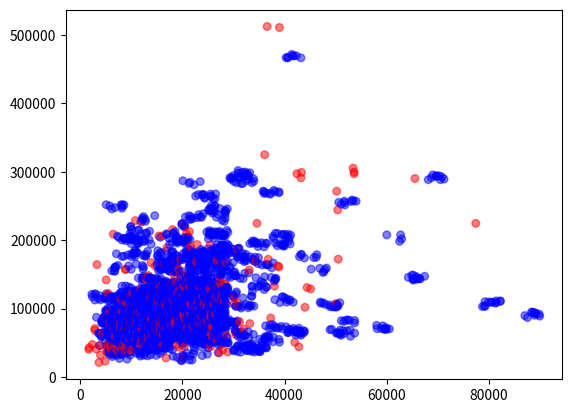

In [187]:
plt.scatter(df_raw["LOAN"], df_raw['VALUE'], c=df_raw['color'], s = 30, alpha=0.5)

### Over-sampling

In [188]:
sm = SMOTE(sampling_strategy = 'auto')

In [189]:
x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)

In [190]:
print("Over-Sampling 전:\n", df_train_y.value_counts(),"\n")
print("Over-Sampling 후 Train X:{}".format(x_resampled.shape))
print("Over-Sampling 후 Train Y:{} \n".format(y_resampled.shape))
print("Over-Sampling 후 '1':{}".format(sum(y_resampled == 1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled == 0)))

Over-Sampling 전:
 0    2382
1     241
Name: BAD, dtype: int64 

Over-Sampling 후 Train X:(4764, 18)
Over-Sampling 후 Train Y:(4764,) 

Over-Sampling 후 '1':2382
Over-Sampling 후 '0':2382


In [191]:
df_resampled= pd.concat([x_resampled, y_resampled],axis = 1)
print(df_resampled.head())

    LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0  27600   103898  130784.0  11.0      0     0.0  147.128398   0.0    29   
1  30200    80951  116160.0  19.0      4     0.0  130.360362   0.0    58   
2   5700    74172   79846.0   0.0      0     0.0  157.009775   0.0    28   
3  14900    22245   31531.0   7.0      0     0.0   91.074218   0.0    16   
4  30500    57516  103086.0   3.0      0     0.0  166.199527   2.0    24   

     DEBTINC  REASON_DebtCon  REASON_HomeImp  JOB_Mgr  JOB_Office  JOB_Other  \
0  42.009814               1               0        0           1          0   
1  50.352999               1               0        0           0          0   
2  47.415229               1               0        0           0          0   
3  21.620580               1               0        0           1          0   
4  37.814089               1               0        0           1          0   

   JOB_ProfExe  JOB_Sales  JOB_Self  BAD  
0            0     

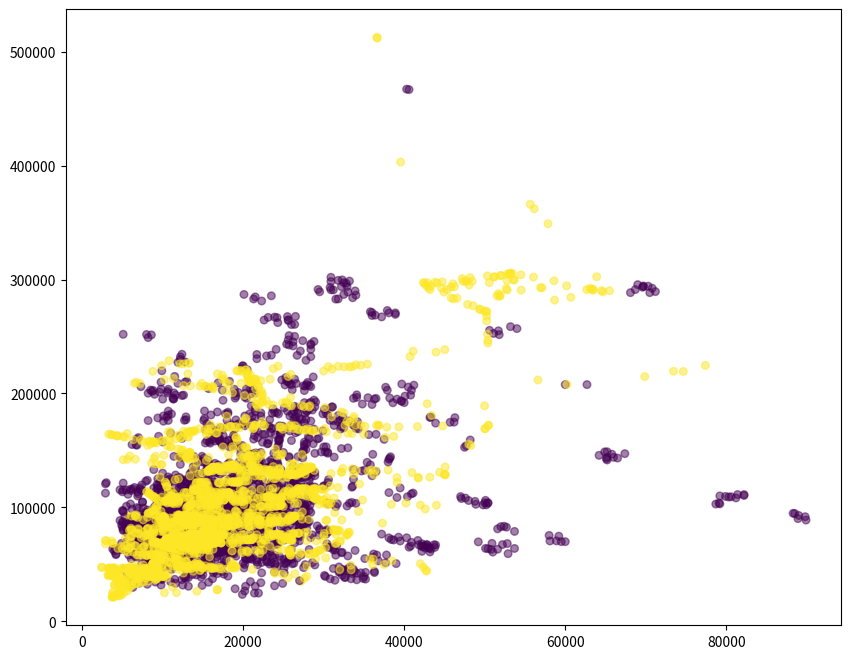

In [192]:
plt.figure(figsize = (10,8))
plt.scatter(df_resampled['LOAN'], df_resampled['VALUE'], c = df_resampled['BAD'], s = 30, alpha = 0.5)
plt.show()

In [193]:
tree_uncust = DecisionTreeClassifier(random_state = 1234)
tree_uncust.fit(df_train_x, df_train_y)

DecisionTreeClassifier(random_state=1234)

In [194]:
print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_train_x, df_train_y)))

Accuracy on training set: 1.000


In [195]:
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x, df_test_y)))

Accuracy on test set: 0.932


In [196]:
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


In [197]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(3,12)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

In [201]:
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,3,0.934,0.921
1,4,0.937,0.928
2,5,0.940,0.930
3,6,0.941,0.930
4,7,0.947,0.935
5,8,0.951,0.933
6,9,0.957,0.933
7,10,0.960,0.938
8,11,0.963,0.936


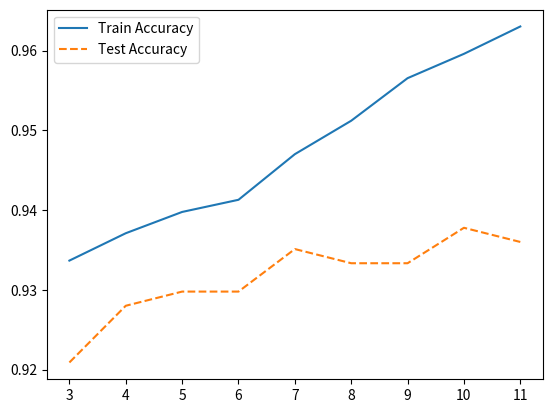

In [202]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

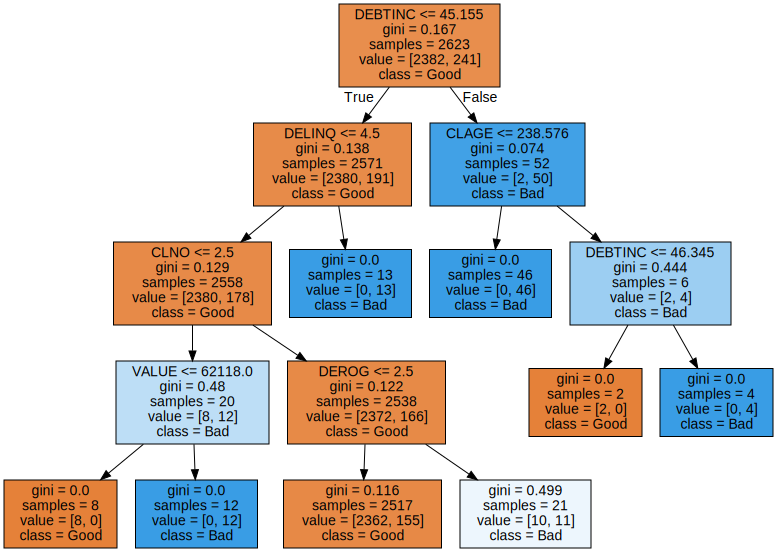

In [203]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(random_state = 1234, max_depth = 4)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

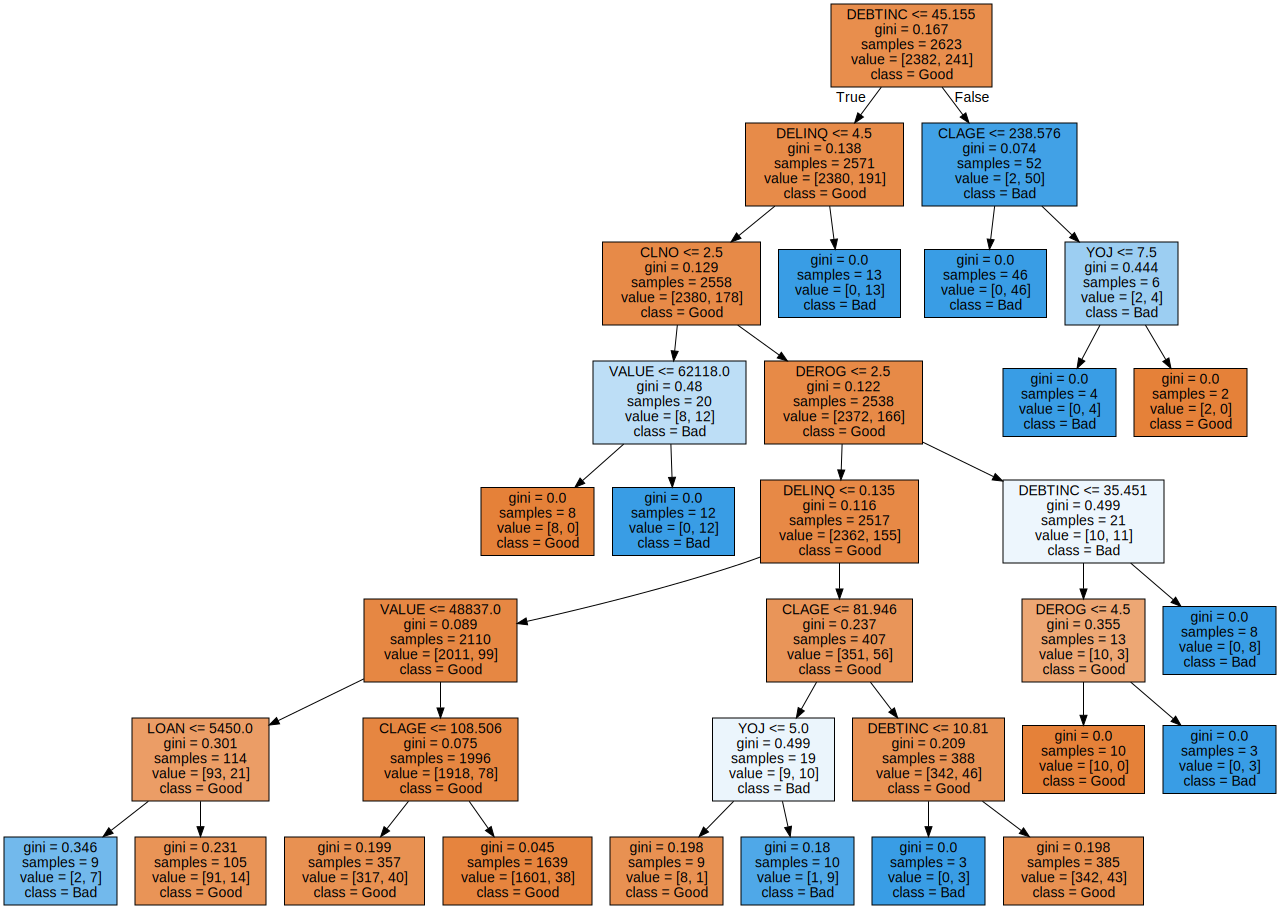

In [204]:

tree_high = DecisionTreeClassifier(random_state = 1234, max_depth = 7)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

min_samples_split

In [205]:
print("전체 자료 =", df_train_x.shape[0], "개")
print("전체 자료의 1% =", df_train_x.shape[0] * 0.01, "개")

전체 자료 = 2623 개
전체 자료의 1% = 26.23 개


In [207]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(2,15)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth = 7
                                , min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.942,0.930
1,30,0.937,0.922
2,40,0.937,0.922
3,50,0.937,0.922
4,60,0.937,0.922
5,70,0.937,0.922
6,80,0.937,0.922
7,90,0.937,0.922
8,100,0.937,0.922
9,110,0.937,0.922


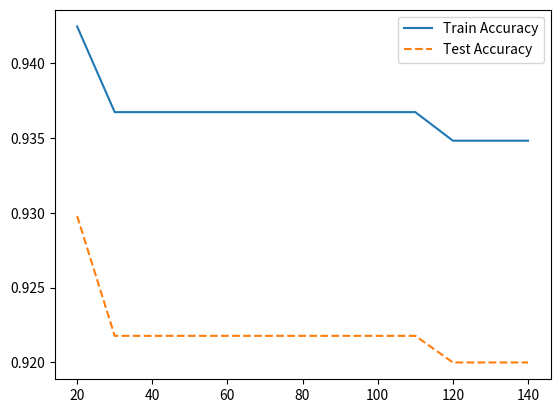

In [208]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

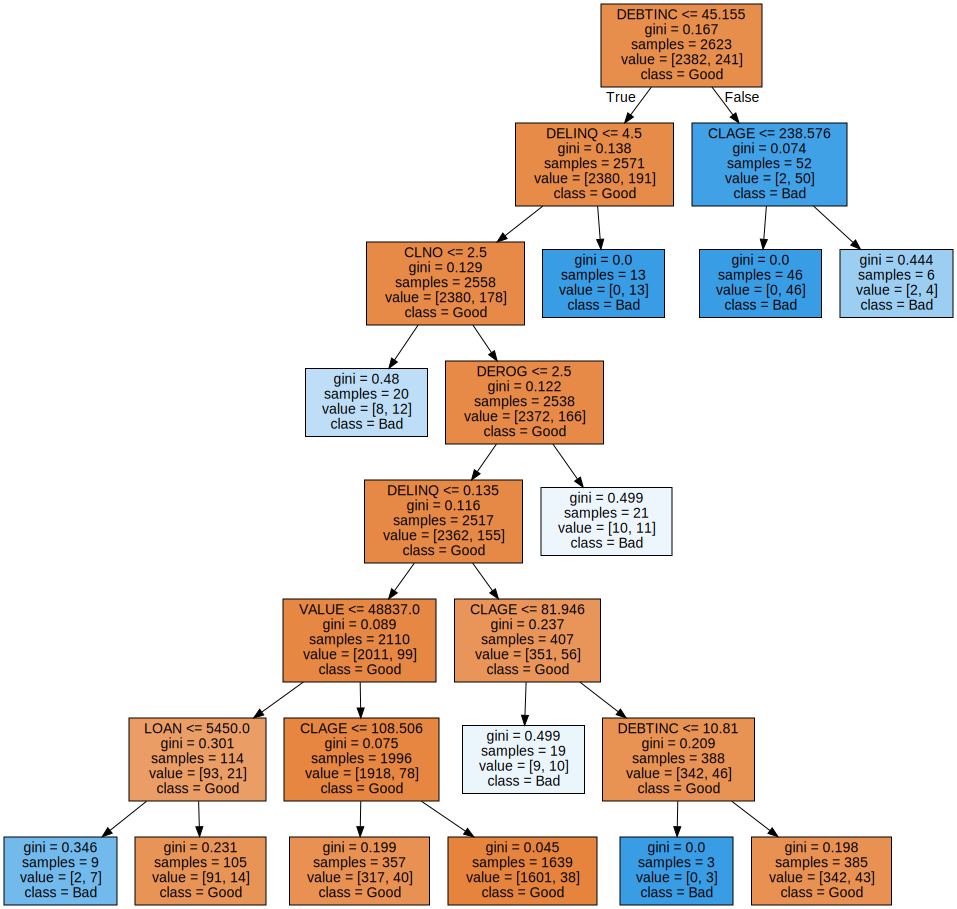

In [209]:
tree_low = DecisionTreeClassifier(random_state = 1234, max_depth = 7, min_samples_split = 50)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

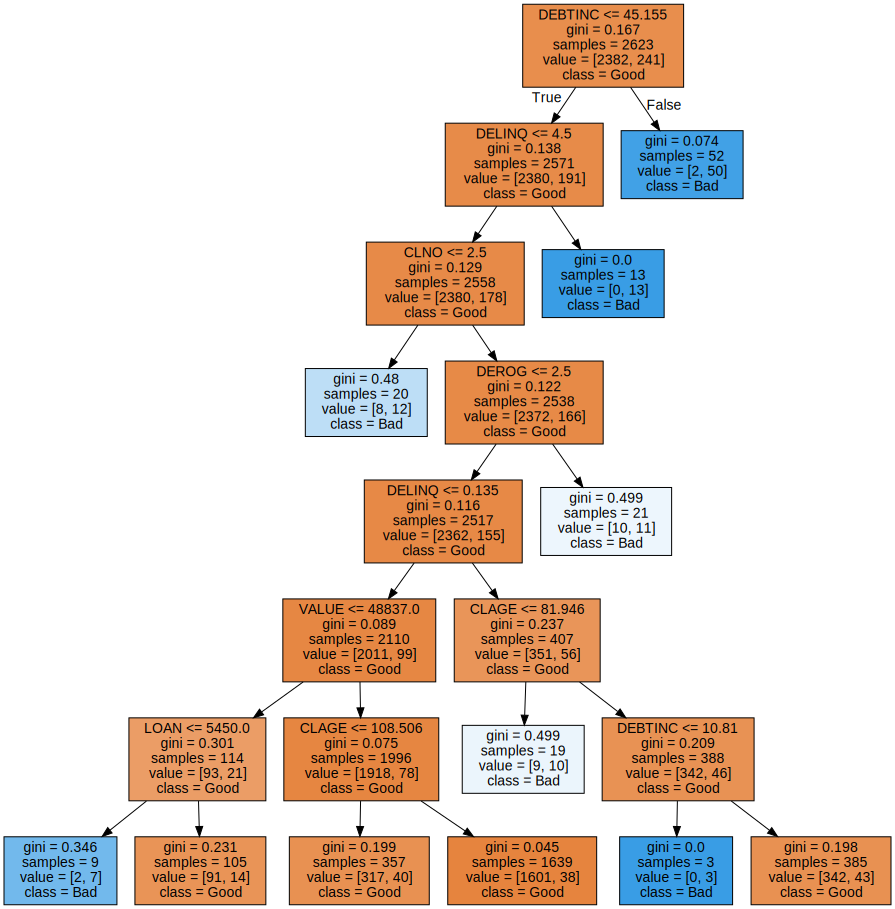

In [210]:
tree_high = DecisionTreeClassifier(random_state = 1234, max_depth = 7, min_samples_split = 110)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### min_samples_leaf

In [216]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 2 for n_leaf in range(5,16)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth = 7, min_samples_split = 50 , min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.935,0.919
1,12,0.935,0.918
2,14,0.934,0.922
3,16,0.934,0.922
4,18,0.934,0.922
5,20,0.934,0.920
6,22,0.934,0.927
7,24,0.934,0.927
8,26,0.934,0.927
9,28,0.933,0.925


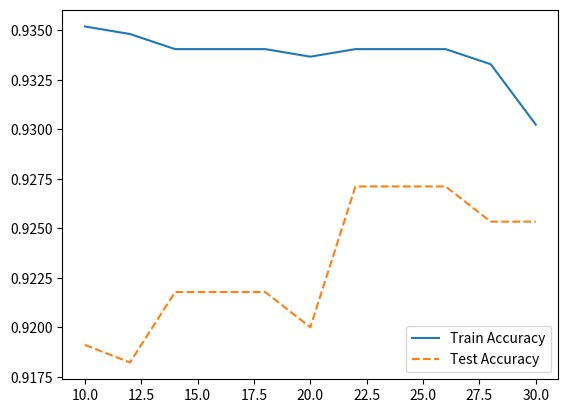

In [217]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

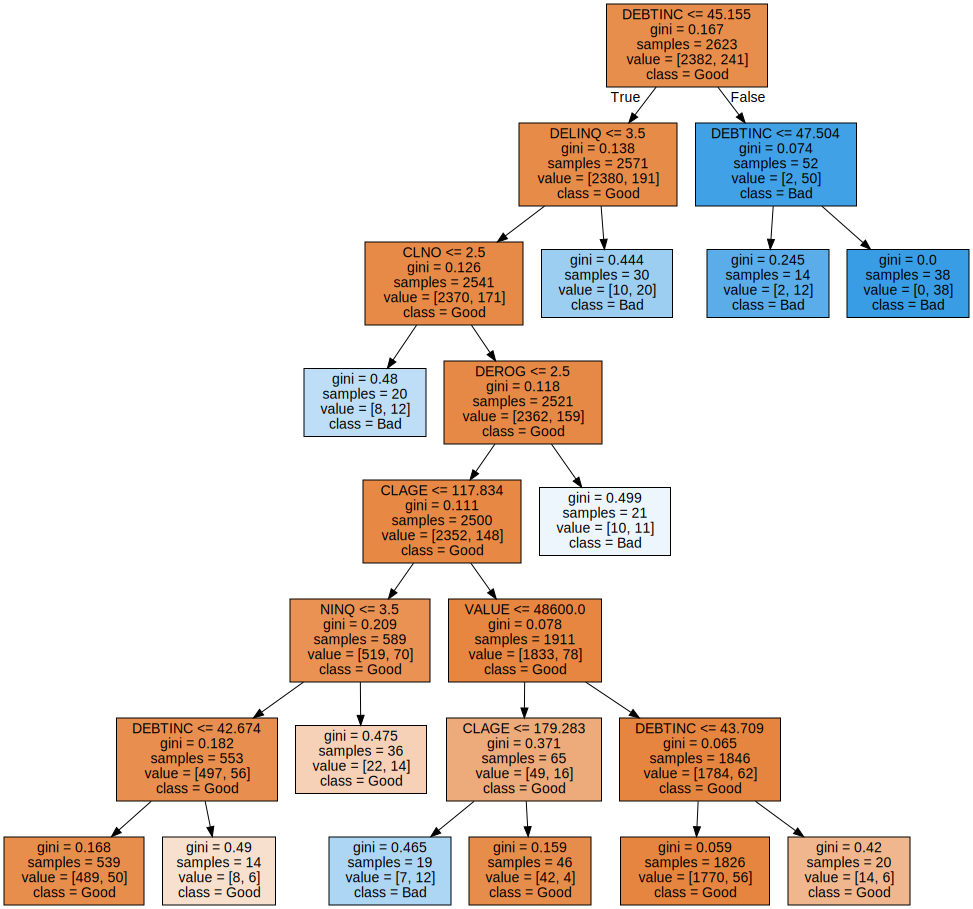

In [218]:
tree_low = DecisionTreeClassifier(random_state = 1234, max_depth = 7, min_samples_split = 50, min_samples_leaf = 14)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

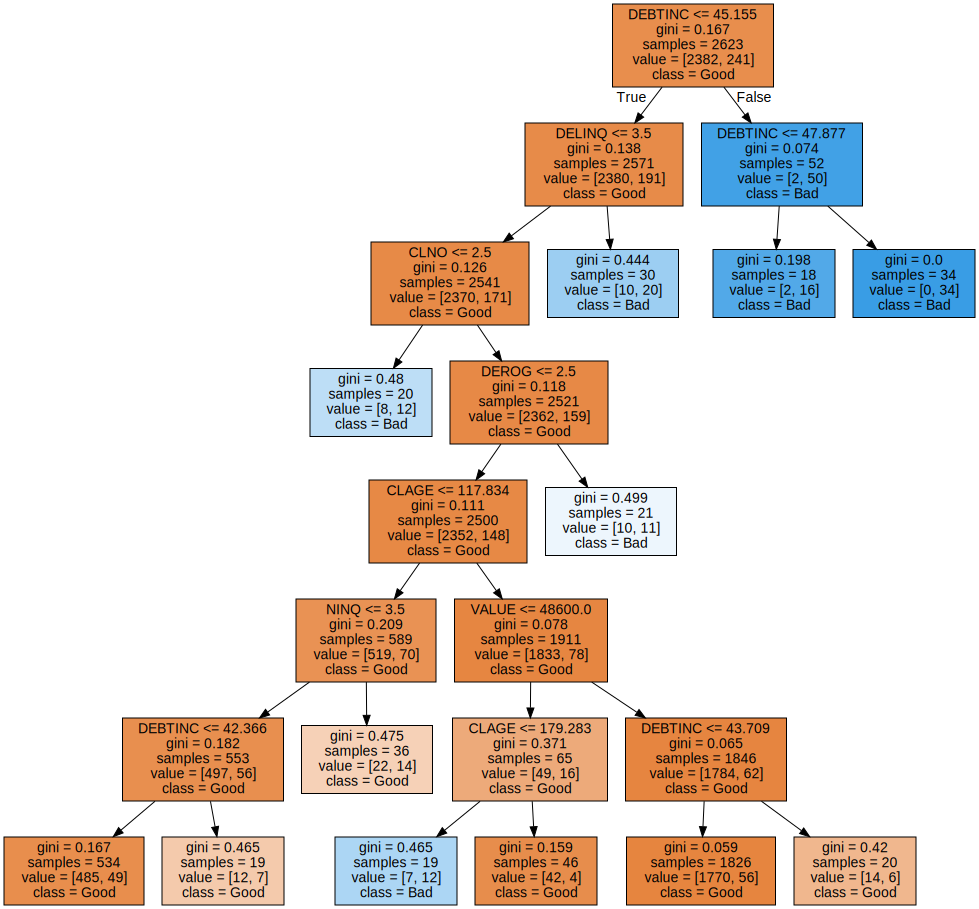

In [219]:
tree_high = DecisionTreeClassifier(random_state = 1234, max_depth = 7, min_samples_split = 50, min_samples_leaf = 18)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [221]:
tree_final = DecisionTreeClassifier(min_samples_leaf = 14, min_samples_split = 50, max_depth = 7, random_state = 1234,)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=14, min_samples_split=50,
                       random_state=1234)

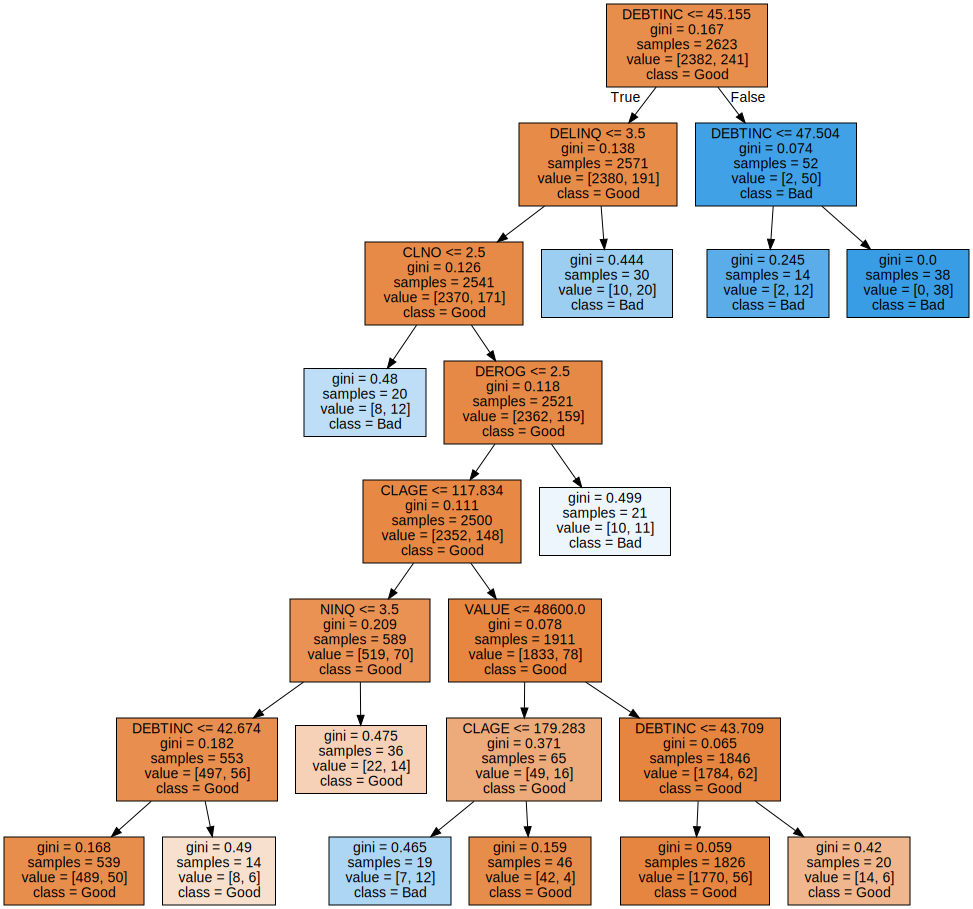

In [222]:
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [224]:
y_pred = tree_final.predict(df_test_x)
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))


Test Accuracy: 0.922

Test Confusion matrix: 
[[1002   19]
 [  69   35]]


In [226]:
print(classification_report(df_test_y, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.936     0.981     0.958      1021
           1      0.648     0.337     0.443       104

    accuracy                          0.922      1125
   macro avg      0.792     0.659     0.700      1125
weighted avg      0.909     0.922     0.910      1125



In [227]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

In [228]:
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.566
5,DELINQ,0.139
6,CLAGE,0.088
8,CLNO,0.075
4,DEROG,0.059
2,VALUE,0.037
7,NINQ,0.037
12,JOB_Mgr,0.000
16,JOB_Sales,0.000
15,JOB_ProfExe,0.000


Text(0, 0.5, '변수')

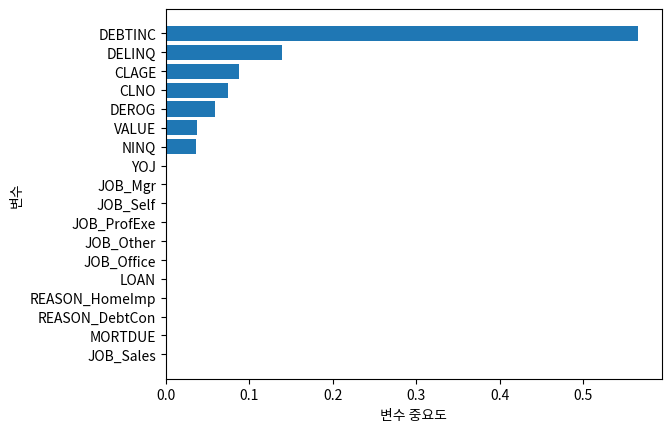

In [229]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

추가연습

In [233]:
df_train_x_over, df_test_x_over, df_train_y_over, df_test_y_over = train_test_split( 
x_resampled, y_resampled, test_size = 0.3, stratify=y_resampled, random_state = 1234)

print("분할 전 데이터 현황... 설명:", x_resampled.shape, " 목표", y_resampled.shape)
print("분할 후 설명변수  현황... 설명:", df_train_x_over.shape, " Test:", df_train_x_over.shape)
print("분할 후 설명변수  현황... 설명:", df_train_y_over.value_counts(), " Test", df_train_y_over.value_counts())

분할 전 데이터 현황... 설명: (4764, 18)  목표 (4764,)
분할 후 설명변수  현황... 설명: (3334, 18)  Test: (3334, 18)
분할 후 설명변수  현황... 설명: 1    1667
0    1667
Name: BAD, dtype: int64  Test 1    1667
0    1667
Name: BAD, dtype: int64


In [234]:
tree_final_over = DecisionTreeClassifier(min_samples_leaf = 14, min_samples_split = 50, max_depth = 7, random_state = 1234,)
tree_final_over.fit(df_train_x_over, df_train_y_over)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=14, min_samples_split=50,
                       random_state=1234)

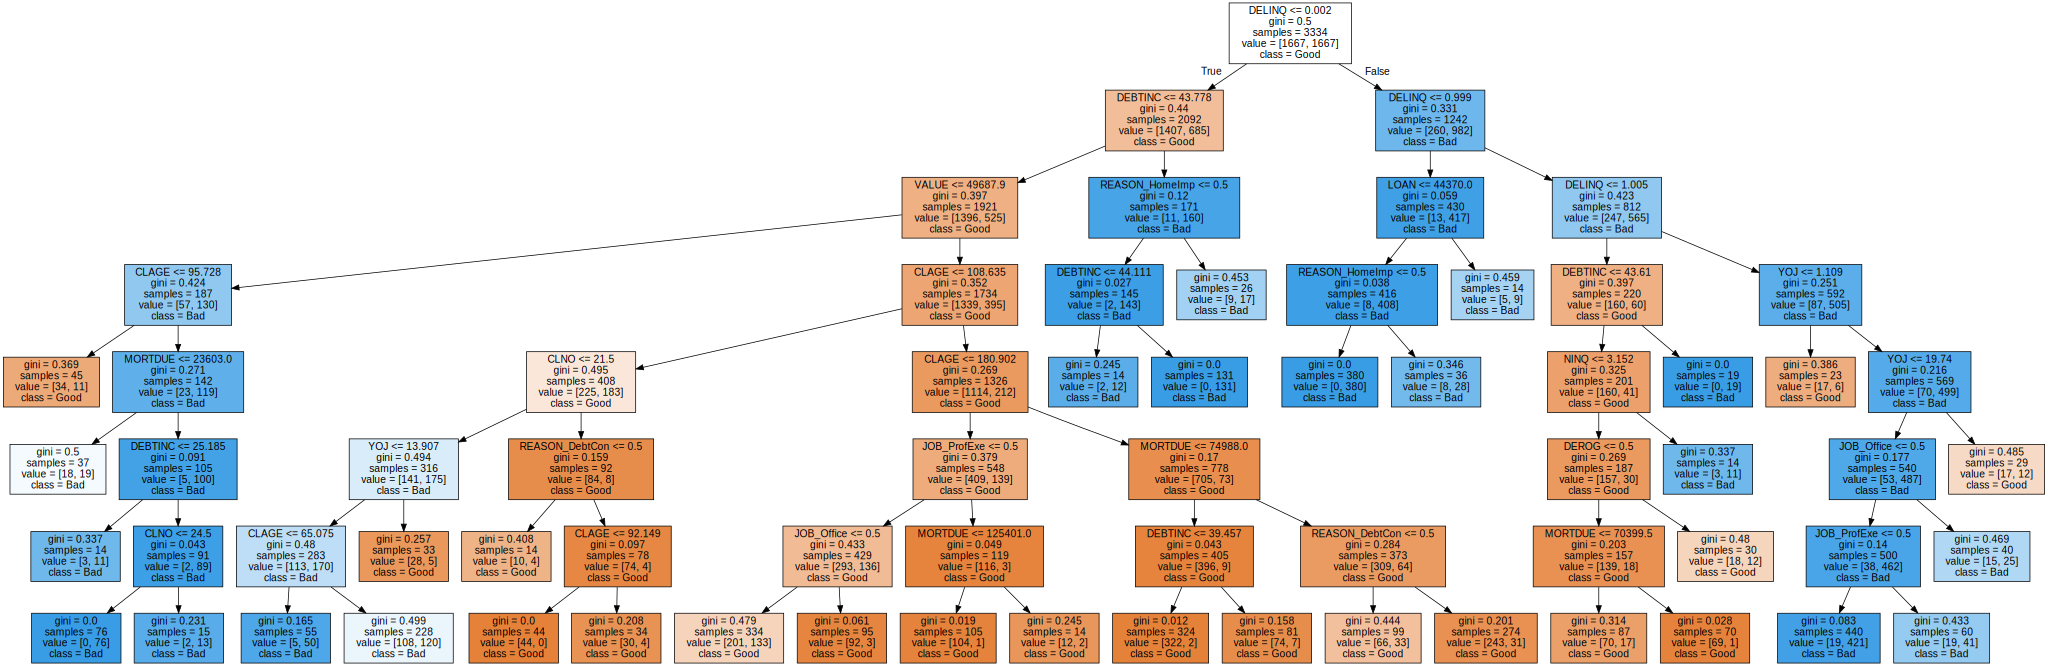

In [235]:
export_graphviz(tree_final_over, out_file = "tree_final_over.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final_over.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [236]:
y_pred_over = tree_final_over.predict(df_test_x)
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x_over, df_test_y_over)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y_over, y_pred_over)))

Test Accuracy: 0.671

Test Confusion matrix: 
[[606 109]
 [149 566]]


In [237]:
print(classification_report(df_test_y_over, y_pred_over, digits=3))

              precision    recall  f1-score   support

           0      0.803     0.848     0.824       715
           1      0.839     0.792     0.814       715

    accuracy                          0.820      1430
   macro avg      0.821     0.820     0.819      1430
weighted avg      0.821     0.820     0.819      1430



In [238]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final_over.feature_importances_
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,DELINQ,0.482
9,DEBTINC,0.161
6,CLAGE,0.105
2,VALUE,0.073
3,YOJ,0.042
8,CLNO,0.031
13,JOB_Office,0.026
15,JOB_ProfExe,0.024
1,MORTDUE,0.022
7,NINQ,0.010


Text(0, 0.5, '변수')

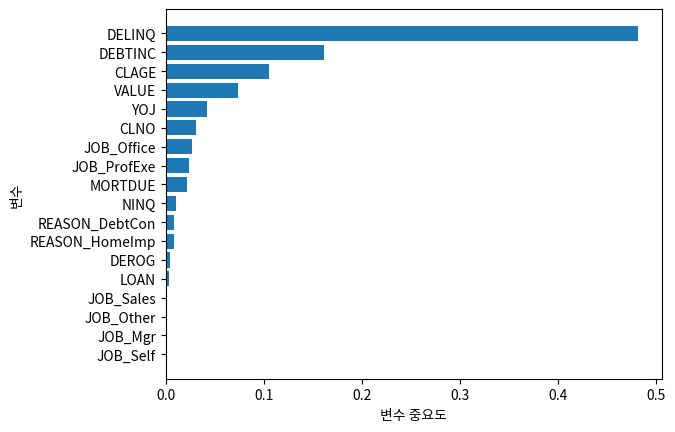

In [239]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [241]:
estimator = DecisionTreeClassifier()
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
              
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parpameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=11, min_samples_leaf=10, min_samples_split=20)

best parpameter: 
{'max_depth': 11, 'min_samples_leaf': 10, 'min_samples_split': 20}

best score: 
0.885
